In [166]:
import pandas as pd
import numpy as np
from math import sqrt

In [106]:
df = pd.read_csv("Housing.csv")


In [107]:
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [108]:
std=np.std(df["price"])
print("standard dev: " , std)

standard dev:  666535.8721081039


In [109]:
var=np.var(df['price'])
print("variance: " , var)

variance:  444270068806.9107


In [110]:
mean=np.mean(df["price"])
print("mean: " , mean)

mean:  1058779.8678899081


In [111]:
mode=np.median(df['price'])
print("mode: " ,mode )

mode:  907584.0


In [112]:
z_score = []
for i in df['price']:
    z_score.append((i-mean) / std)
    

In [113]:
print("zscore" , z_score)

zscore [0.6107940309686177, 3.0982940581705916, 0.6918099256258851, 0.14002567005869196, -0.25728227851792934, -0.9012746245598569, 1.5832608210153993, 1.0118047059899453, 1.503505173608356, 1.5351313784116005, 0.0620823782210187, -0.2268383056589429, -0.5869089485801313, 0.32288154488883547, 0.6166991895125252, 0.4535991906239909, 1.1154090323131352, 1.003847144781387, -0.6806713439968087, -0.36913822374139654, -0.7409231649122876, -0.7926893210095904, -1.079173526872452, 1.7199916464873386, 0.06760946258985895, -0.017709276250316652, 3.0492284318951977, -0.6093143443359023, -0.26181916861873633, 0.6397797177237734, -0.26823442724011554, 1.31318383411498, 0.42582574170000326, -0.1434939541774518, -0.2916870284490489, 0.6591995277319895, 1.9608158942391025, 1.3488308277641776, 1.1215302332427954, 1.7601755302373432, -0.10497239656226666, 0.19494844545893722, 2.569014217785973, 1.0234229854015355, 3.011421014388473, 2.97671020441087, 0.6204439241989056, 1.0093682279728453, 0.31499599780

In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df =df.iloc[: , 4:].apply(le.fit_transform )

In [115]:
df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3,1,2,1,0,0,0,1,2,1,0
1,3,3,3,1,0,0,0,1,3,0,0
2,2,1,1,1,0,1,0,0,2,1,1
3,3,1,1,1,0,1,0,1,3,1,0
4,3,0,1,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,1,0,0,1,0,1,0,0,2,0,2
541,2,0,0,0,0,0,0,0,0,0,1
542,1,0,0,1,0,0,0,0,0,0,2
543,2,0,0,0,0,0,0,0,0,0,0


In [116]:

Y = df['furnishingstatus']
X = df.drop('furnishingstatus' , axis = 1)

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.20 , random_state=32)

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train, y_train)

ExtraTreesClassifier(n_estimators=10)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
predit = model.predict(x_test)
print("Accuracy" , accuracy_score(predit  , y_test))

Accuracy 0.3669724770642202


In [120]:
df=pd.read_csv('Housing.csv')
mylist=[]
for i in range(4):
    column=df[df.columns[i]]
    minimum=min(column)
    for j in column:
        something=j-minimum
        replace_value=something/(max(column)-minimum)
        mylist.append(replace_value)
    df[df.columns[i]]=mylist
    mylist=[]
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.287069,0.288093,0.586,0.224,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,0.663195,0.569795,0.868,0.464,4,4,4,yes,no,no,no,yes,3,no,furnished
2,0.299319,0.549533,0.396,0.926,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,0.215885,0.372335,0.164,0.908,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,0.155810,0.244745,0.406,0.282,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.040247,0.181372,0.340,0.204,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,0.064113,0.282747,0.394,0.372,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,0.037161,0.168264,0.148,0.374,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,0.121071,0.524684,0.540,0.688,3,1,1,no,no,no,no,no,0,no,furnished


In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.iloc[:, 4:] = df.iloc[: , 4:].apply(le.fit_transform )

In [177]:
print(df)

        price      area    length     width  bedrooms  bathrooms   stories  \
0    0.092356 -0.094277  0.107728 -0.265468  1.034862   0.713761  1.194495   
1    0.468483  0.187426  0.389728 -0.025468  1.034862   2.713761  2.194495   
2    0.104606  0.167163 -0.082272  0.436532  0.034862   0.713761  0.194495   
3    0.021173 -0.010035 -0.314272  0.418532  1.034862   0.713761  0.194495   
4   -0.038903 -0.137625 -0.072272 -0.207468  1.034862  -0.286239  0.194495   
..        ...       ...       ...       ...       ...        ...       ...   
540 -0.154465 -0.200997 -0.138272 -0.285468 -0.965138  -0.286239 -0.805505   
541 -0.130599 -0.099623 -0.084272 -0.117468  0.034862  -0.286239 -0.805505   
542 -0.157551 -0.214106 -0.330272 -0.115468 -0.965138  -0.286239 -0.805505   
543 -0.073642  0.142314  0.061728  0.198532  0.034862  -0.286239 -0.805505   
544  0.128510  0.217931 -0.024272  0.452532  0.034862  -0.286239  0.194495   

     mainroad  guestroom  basement  hotwaterheating  airconditi

In [127]:
Y = df['furnishingstatus']

X = df.drop('furnishingstatus' , axis = 1)

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.20 , random_state=32)

In [129]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train, y_train)

ExtraTreesClassifier(n_estimators=10)

In [130]:
predit = model.predict(x_test)
print("Accuracy" , accuracy_score(predit  , y_test))

Accuracy 0.42201834862385323


In [131]:
import matplotlib.pyplot as plt

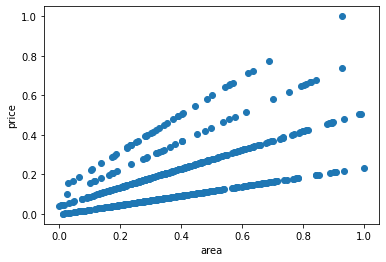

In [134]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'] , df['price'])

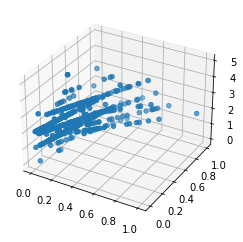

In [137]:
figure = plt.figure()
ax = figure.add_subplot(projection='3d')
ax.scatter(df['price'],df['area'] , df['bedrooms'] )

In [142]:
for i in df.columns:
    df[i] = df[i] - np.mean(df[i])

In [143]:
np_df = np.array(df[['area', 'length']])

In [146]:
variance_matrix = np.dot(np_df.T , np_df)

In [148]:
corelation = variance_matrix / np.diag(variance_matrix)

In [149]:
np.diag(corelation)

array([1., 1.])

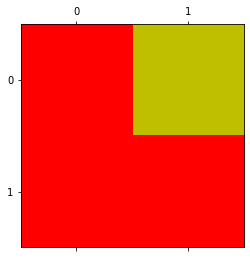

In [158]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['y', 'b', 'r'])
plt.matshow(corelation,cmap=cmap)

In [159]:
print('corelation: ',corelation)

corelation:  [[1.         0.51092759]
 [0.94798126 1.        ]]


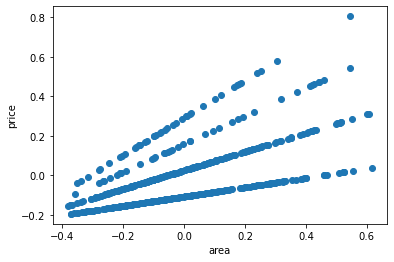

In [161]:

display = df[['price' , 'area']]
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'] , df['price'])

In [163]:
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))
manhattan(display.iloc[0] , display.iloc[2])

0.27368999631358254

In [164]:
manhattan(display.iloc[0] , display.iloc[3])

0.15542502768065417

In [170]:
print("euclid: " , sqrt(manhattan(display.iloc[0] , display.iloc[3])))
print("euclid: " , sqrt(manhattan(display.iloc[0] , display.iloc[2])))

euclid:  0.3942398098627968
euclid:  0.5231538935280732


In [178]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()
print(mahalanobis(x = display , data = display))

[ 1.39684439 11.23524025  0.66901405  0.04682944  0.42475862  0.81149063
  4.85417195  1.64085677  4.00835856  4.72856727  0.06644897  0.37133637
  1.26314465  0.10525502  0.50589965  0.2368017   2.05163485  3.65756338
  1.58857487  0.65590384  1.81802203  0.71363074  1.46575377  5.38652873
  0.06418104  0.11410092 10.95486334  1.06724089  0.43306744  0.55339222
  3.44438465  4.2107812   0.20258974  0.24585808  0.49001796  3.27220508
  3.97733209  4.28713631  3.84491154  5.35667651  0.19814468  3.13800354
  8.47126349  3.68675919 10.74218576  8.8559706   3.24410079  3.66571811
  0.0997134   1.82255549  5.1713832   3.92017489  6.04503335  3.31451556
  0.33551594  0.14329189  1.4211291   7.34388321  6.08759581  3.55210384
  3.08511743  1.10773023  1.45615747  2.30659697  0.76836504  0.31595306
  3.83452633  0.74919397  0.7144718   3.59976894  1.20833772 13.75311351
  4.55663054  3.23953941  0.67490082  0.05062619 10.27520183  3.38187446
  0.96535662  1.8835103   1.16563055  0.65978011  1

In [176]:
import itertools as it
ss = list(it.product(['A', 'B', 'C' , 'D' ,'E'] , repeat = 3))
print("sample space: " ,ss)

sample space:  [('A', 'A', 'A'), ('A', 'A', 'B'), ('A', 'A', 'C'), ('A', 'A', 'D'), ('A', 'A', 'E'), ('A', 'B', 'A'), ('A', 'B', 'B'), ('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'B', 'E'), ('A', 'C', 'A'), ('A', 'C', 'B'), ('A', 'C', 'C'), ('A', 'C', 'D'), ('A', 'C', 'E'), ('A', 'D', 'A'), ('A', 'D', 'B'), ('A', 'D', 'C'), ('A', 'D', 'D'), ('A', 'D', 'E'), ('A', 'E', 'A'), ('A', 'E', 'B'), ('A', 'E', 'C'), ('A', 'E', 'D'), ('A', 'E', 'E'), ('B', 'A', 'A'), ('B', 'A', 'B'), ('B', 'A', 'C'), ('B', 'A', 'D'), ('B', 'A', 'E'), ('B', 'B', 'A'), ('B', 'B', 'B'), ('B', 'B', 'C'), ('B', 'B', 'D'), ('B', 'B', 'E'), ('B', 'C', 'A'), ('B', 'C', 'B'), ('B', 'C', 'C'), ('B', 'C', 'D'), ('B', 'C', 'E'), ('B', 'D', 'A'), ('B', 'D', 'B'), ('B', 'D', 'C'), ('B', 'D', 'D'), ('B', 'D', 'E'), ('B', 'E', 'A'), ('B', 'E', 'B'), ('B', 'E', 'C'), ('B', 'E', 'D'), ('B', 'E', 'E'), ('C', 'A', 'A'), ('C', 'A', 'B'), ('C', 'A', 'C'), ('C', 'A', 'D'), ('C', 'A', 'E'), ('C', 'B', 'A'), ('C', 'B', 'B'), ('C', 'B', 'C')

In [181]:
same_city = 0
diff_city = 0
any_two_same = 0
first_two_same = 0
last_two_same = 0
first_last_same = 0

for i in sample_Space:
    if i[0] == i[1] and i[0] == i[2] and i[1] == i[2]:
        same_city +=1
    if i[0] == i[1] or i[0] == i[2] or i[1] == i[2]:
        any_two_same +=1
    if i[0] != i[1] and i[0] != i[2] and i[1] != i[2]:
        diff_city +=1
    if i[0] == i[1] and i[1] != i[2] and i[0] !=i[2]:
        first_two_same +=1
    if  i[1] == i[2] and i[1] != i[0] and i[0] != i[2]:
        last_two_same +=1
    if i[0] == i[2] and i[0] != i[1] and i[2] != i[1]:
        first_last_same +=1
    


In [192]:
print("same city prob:" ,same_city/len(sample_Space))  
print("different city prob: ",diff_city/len(sample_Space))
print("first two same: ",first_two_same/len(sample_Space))
print("last two same prob: ",last_two_same/len(sample_Space))
print("first and last same: ",first_last_same/len(sample_Space))

same city prob: 0.04
different city prob:  0.48
first two same:  0.16
last two same prob:  0.16
first and last same:  0.16


In [194]:
any2Prob=any_two_same/len(sample_Space)*100
print("probabilty of both friends go to same place: ",any2Prob,"%")

probabilty of both friends go to same place:  52.0 %


<function matplotlib.pyplot.show(close=None, block=None)>

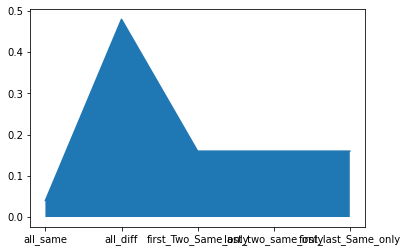

In [195]:
plt.plot(["all_same","all_diff","first_Two_Same_only","last_two_same_only" , "first_last_Same_only"] ,[0.04 ,0.48 ,0.16, 0.16 ,0.16]  )
plt.fill_between(["all_same","all_diff","first_Two_Same_only","last_two_same_only" , "first_last_Same_only"] , [0.04 ,0.48 ,0.16, 0.16 ,0.16])
plt.show

In [ ]:
'''
Q1_Is it a discrete distribution or a continuous one?
its a discrete distribution

Q2_Is it univariate or a multivariate problem?
#multivariet problem
'''